In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from Kmeans import Kmeans
from sklearn.cluster import KMeans
import pandas as pd
import sklearn

In [70]:
data,_ = make_blobs(n_samples=1000, n_features=5)

In [71]:
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.express as px
fig = px.scatter_3d(data, x=0, y=1, z=2,
                    color=3, symbol=4)
fig.show()
#I see 3 blobs

C:\Users\Icego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Icego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Icego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Icego\AppData\Local\Packages\PythonSo

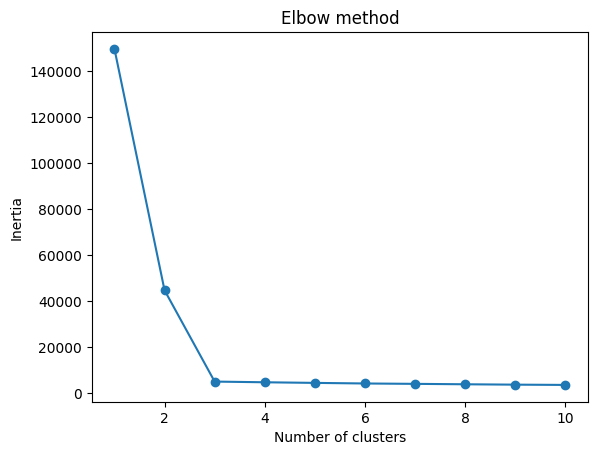

In [4]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [72]:
#run my Kmeans with 3 clusters        
kmeans0 = Kmeans(num_clusters = 3, max_iter = 500)

final_centroids, assignments = kmeans0.fit(data)

final_centroids

array([[-9.26085133, -7.16371404, -6.60060112, -4.06316004,  7.14738183],
       [-7.89585339, -9.65231065,  8.40727746,  5.87268846,  9.15663156],
       [-4.69683777, -3.72683731,  4.17265416, -5.74686142,  5.69397902]])

In [73]:
#run the real KMeans with 3 clusters
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(data)

C:\Users\Icego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [7]:
#testing my Kmeans
fig = px.scatter_3d(data, x=0, y=1, z=2,
                    color=assignments, symbol=4)
fig.show()

In [8]:
#testing real Kmeans
fig = px.scatter_3d(data, x=0, y=1, z=2,
                    color=kmeans1.labels_, symbol=4)
fig.show()

In [77]:
#For Dataset 1, my kmeans yields the same clusters as sklearn's and does not have disproportionate samples assigned to one cluster.
sklearn.metrics.v_measure_score(kmeans1.labels_,assignments)
#metrics score is 1.0, I am the best of all time. 

#let's test with Dataset 2 

1.0

In [3]:
data = pd.read_csv('historical-weather.csv')
data.isna().sum()
#very limited NAs, probably safe to just drop
data = data.dropna()
data = data.drop('rowID', axis = 1)
data.reset_index(drop=True)

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
1,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
2,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
3,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
4,2011-09-10 08:20:49,912.4,54.50,207.0,1.5,215.0,1.7,198.0,1.3,0.0,0.0,88.7
...,...,...,...,...,...,...,...,...,...,...,...,...
15864,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15865,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15866,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15867,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [4]:
i=0
data.iloc[1,0][:10]

'2011-09-10'

In [5]:
data.info()
#we have 1 object, and the rest are floats/int
data.hpwren_timestamp
#this is date/time information, to convert this into int or float,

<class 'pandas.core.frame.DataFrame'>
Index: 15869 entries, 1 to 15872
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hpwren_timestamp    15869 non-null  object 
 1   air_pressure        15869 non-null  float64
 2   air_temp            15869 non-null  float64
 3   avg_wind_direction  15869 non-null  float64
 4   avg_wind_speed      15869 non-null  float64
 5   max_wind_direction  15869 non-null  float64
 6   max_wind_speed      15869 non-null  float64
 7   min_wind_direction  15869 non-null  float64
 8   min_wind_speed      15869 non-null  float64
 9   rain_accumulation   15869 non-null  float64
 10  rain_duration       15869 non-null  float64
 11  relative_humidity   15869 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


1        2011-09-10 01:40:49
2        2011-09-10 03:20:49
3        2011-09-10 05:00:49
4        2011-09-10 06:40:49
5        2011-09-10 08:20:49
                ...         
15868    2014-09-10 16:23:29
15869    2014-09-10 18:03:29
15870    2014-09-10 19:43:29
15871    2014-09-10 21:23:29
15872    2014-09-10 23:03:29
Name: hpwren_timestamp, Length: 15869, dtype: object

In [6]:
#I want to change this into something useful, like days since start. 
prev = '2011-09-10'
currday = 0 
daysSince = [0] * len(data)
for i in range(len(data)):
    if (data.iloc[i,0][:10]!=prev):
        currday +=1
        prev = data.iloc[i,0][:10]
    daysSince[i] = currday


In [7]:
#this loses some information, as we have only by day, and it's slightly inaccurate, as we range from 0-1080,
#which is less than 3 years exactly, but it's as good as I'm going to get right now. 
daysSince

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15

In [8]:
#adding new column, removing old object column
data['days_since'] = daysSince
data = data.drop('hpwren_timestamp', axis = 1)
data

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,days_since
1,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9,0
2,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4,0
3,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2,0
4,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8,0
5,912.4,54.50,207.0,1.5,215.0,1.7,198.0,1.3,0.0,0.0,88.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15868,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2,1080
15869,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8,1080
15870,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9,1080
15871,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7,1080


In [9]:
data.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,days_since
count,15869.000000,15869.000000,15869.000000,15869.000000,15869.000000,15869.000000,15869.000000,15869.000000,15869.000000,15869.000000,15869.000000,15869.000000
mean,916.829750,61.857201,161.291575,2.792904,162.704518,3.414739,166.649442,2.152341,0.000246,0.381246,47.590270,533.201588
std,3.051546,11.835209,95.314798,2.070533,92.271411,2.428940,97.825772,1.758145,0.005780,4.388448,26.190304,312.350781
min,905.100000,32.360000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000
25%,914.800000,52.700000,61.000000,1.300000,68.000000,1.600000,75.000000,0.800000,0.000000,0.000000,24.700000,253.000000
50%,916.700000,62.420000,182.000000,2.200000,186.000000,2.800000,180.000000,1.700000,0.000000,0.000000,44.600000,529.000000
75%,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,67.900000,805.000000
max,929.400000,96.440000,359.000000,20.100000,359.000000,20.900000,359.000000,19.500000,0.430000,60.000000,92.900000,1080.000000


In [10]:
fig = px.scatter_3d(data, x='air_pressure', y='air_temp', z='avg_wind_direction',
                    color='days_since', symbol='max_wind_speed')
fig.show()

NameError: name 'px' is not defined

C:\Users\Icego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Icego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Icego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

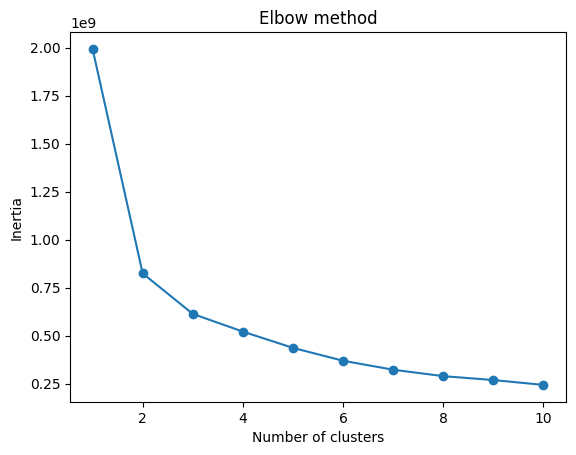

In [11]:
#this is just one big blob, I'm not sure how many clusters I should look for
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
#I choose 3 clusters based on absolutely no science at all

In [13]:
#convert data into a numpy array so we can use my kmeans
data=data.to_numpy()

In [14]:
kmeans0 = Kmeans(num_clusters = 3, max_iter = 1000)

final_centroids, assignments = kmeans0.fit(data)

final_centroids

array([[9.16731719e+02, 6.30544807e+01, 1.62663750e+02, 2.88700895e+00,
        1.64763516e+02, 3.52637106e+00, 1.65198561e+02, 2.21946713e+00,
        1.20575651e-04, 2.39206534e-01, 4.54290937e+01, 9.01663555e+02],
       [9.16654537e+02, 6.10804077e+01, 1.61498467e+02, 2.88360094e+00,
        1.63031030e+02, 3.51751759e+00, 1.65101930e+02, 2.24221541e+00,
        3.49990980e-04, 4.49215226e-01, 4.78158578e+01, 1.82650911e+02],
       [9.17114333e+02, 6.15002083e+01, 1.59709298e+02, 2.60258488e+00,
        1.60313079e+02, 3.19411651e+00, 1.69743248e+02, 1.98966049e+00,
        2.58487654e-04, 4.49459877e-01, 4.94927276e+01, 5.42551698e+02]])

In [15]:
#run real KMeans 
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(data)

C:\Users\Icego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [17]:
#compare the two using the v_measure because the graph isn't giving me discernable information
sklearn.metrics.v_measure_score(kmeans1.labels_,assignments)

0.9951819052324526

In [ ]:
#my kmeans appears to be really really good. :)